### Face Mask Detection
#### Mohammad Sayem Chowdhury

## Import Library

In [1]:
import os
import cv2
import random
import pickle
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

np.random.seed(1000)
# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
%matplotlib inline

In [2]:
tf.config.set_visible_devices([], 'GPU')
# print(f"Number of GPU = {len(gpu_device)}")
# tf.config.experimental.set_memory_growth(gpu_device[0], True)
# !nvidia-smi
print("GPU is ", "available" if tf.config.list_physical_devices('GPU') else "not available")


GPU is  not available


## Import Dataset

In [3]:
# DATA_DIR = 'Face Mask Dataset'
# TRAIN_DATA_DIR = os.path.join(DATA_DIR, 'train')
# VALID_DATA_DIR = os.path.join(DATA_DIR, 'valid')
# TEST_DATA_DIR = os.path.join(DATA_DIR, 'test')

## Define Categories Train Data

In [4]:
# IMG_SIZE = 227
# CATEGORIES = []

# for i in os.listdir(TRAIN_DATA_DIR):
#     CATEGORIES.append(i)
    
# print(CATEGORIES)

## Data With Viz

In [5]:
# plt.figure(figsize=(15,4))
# i=0
# for c in CATEGORIES:  
#     path = os.path.join(TRAIN_DATA_DIR,c)
#     for img in os.listdir(path):
#         img_array = cv2.imread(os.path.join(path,img))
#         plt.subplot(2,10,i+1)
#         plt.imshow(img_array)
#         if i%10 == 0:
#             plt.ylabel(c)
#         plt.xticks([])
#         plt.yticks([])
#         i += 1
#         if i%10 == 0:
#             break

# plt.tight_layout()        
# plt.show() 

## Train Data

In [6]:
# training_data = []

# for c in CATEGORIES:
#     path = os.path.join(TRAIN_DATA_DIR, c) # 'Face Mask Dataset/train/WithMask'
#     class_num = CATEGORIES.index(c) # 0
#     for img in tqdm(os.listdir(path)):
#         try:
#             img_array = cv2.imread(os.path.join(path, img))   # read the image
#             img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize the image
#             training_data.append([img_resized, class_num]) # [ [img, 0], [], [], [], ...., []]
#         except WException as e:
#             pass
        
# print(len(training_data))

## Valid Data

In [7]:
# valid_data = []

# for c in CATEGORIES:
#     path = os.path.join(VALID_DATA_DIR, c) 
#     class_num = CATEGORIES.index(c) 
#     for img in tqdm(os.listdir(path)):
#         try:
#             img_array = cv2.imread(os.path.join(path, img))   
#             img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
#             valid_data.append([img_resized, class_num])
#         except WException as e:
#             pass
        
# print(len(valid_data))

In [8]:
# test_data = []

# for c in CATEGORIES:
#     path = os.path.join(TEST_DATA_DIR, c) 
#     class_num = CATEGORIES.index(c) 
#     for img in tqdm(os.listdir(path)):
#         try:
#             img_array = cv2.imread(os.path.join(path, img))   
#             img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
#             test_data.append([img_resized, class_num])
#         except WException as e:
#             pass
        
# print(len(test_data))

In [9]:
# random.shuffle(training_data)
# random.shuffle(valid_data)
# random.shuffle(test_data)

In [10]:
# X_train = []
# Y_train = []

# for img, label in training_data:
#     X_train.append(img)
#     Y_train.append(label)
    
# X_train = np.array(X_train).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE, 3)
# Y_train = np.array(Y_train)

# print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")

In [11]:
# X_valid = []
# Y_valid = []

# for img, label in valid_data:
#     X_valid.append(img)
#     Y_valid.append(label)
    
# X_valid = np.array(X_valid).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE, 3)
# Y_valid = np.array(Y_valid)

# print(f"X_valid= {X_valid.shape} Y_valid= {Y_valid.shape}")

### Test Data

In [12]:
# X_test = []
# Y_test = []

# for features,label in test_data:
#     X_test.append(features)
#     Y_test.append(label)

# X_test = np.array(X_test).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE, 3)
# Y_test = np.array(Y_test)

# print(f"X_test= {X_test.shape} Y_test= {Y_test.shape}")

In [13]:
# pickle_out = open("X_train.pickle","wb")
# pickle.dump(X_train, pickle_out)
# pickle_out.close()

# pickle_out = open("Y_train.pickle","wb")
# pickle.dump(Y_train, pickle_out)
# pickle_out.close()

# pickle_out = open("X_valid.pickle","wb")
# pickle.dump(X_valid, pickle_out)
# pickle_out.close()

# pickle_out = open("Y_valid.pickle","wb")
# pickle.dump(Y_valid, pickle_out)
# pickle_out.close()

# pickle_out = open("X_test.pickle","wb")
# pickle.dump(X_test, pickle_out)
# pickle_out.close()

# pickle_out = open("Y_test.pickle","wb")
# pickle.dump(Y_test, pickle_out)
# pickle_out.close()


pickle_in = open("Face Mask Dataset/X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("Face Mask Dataset/Y_train.pickle","rb")
Y_train = pickle.load(pickle_in)

pickle_in = open("Face Mask Dataset/X_valid.pickle","rb")
X_valid = pickle.load(pickle_in)

pickle_in = open("Face Mask Dataset/Y_valid.pickle","rb")
Y_valid = pickle.load(pickle_in)

pickle_in = open("Face Mask Dataset/X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("Face Mask Dataset/Y_test.pickle","rb")
Y_test = pickle.load(pickle_in)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")
print(f"X_valid= {X_valid.shape} Y_valid= {Y_valid.shape}")
print(f"X_test= {X_test.shape} Y_test= {Y_test.shape}")

X_train= (10000, 227, 227, 3) Y_train= (10000,)
X_valid= (800, 227, 227, 3) Y_valid= (800,)
X_test= (992, 227, 227, 3) Y_test= (992,)


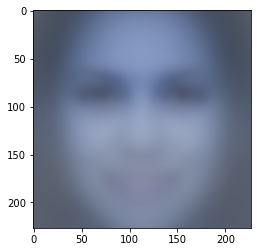

In [14]:
mean_img = np.mean(X_train, axis=0)
plt.imshow(mean_img.astype('uint8'))

In [15]:
X_train_norm, X_valid_norm, X_test_norm = X_train-mean_img, X_valid-mean_img, X_test-mean_img

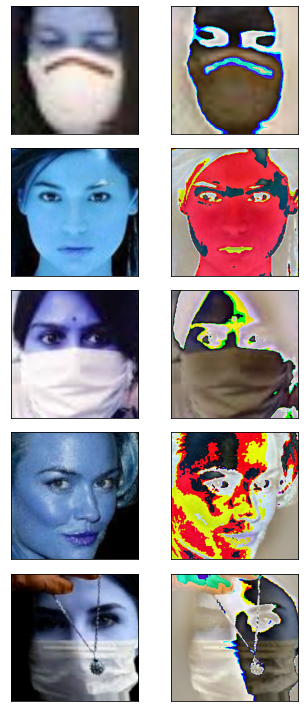

In [16]:
c = 0
plt.figure(figsize=(5,10))
for i in range(5):
    plt.subplot(5,2,c+1)
    plt.imshow(X_train[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(5,2,c+2)
    plt.imshow(X_train_norm[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])

    c += 2
    
plt.tight_layout()
plt.show()

In [17]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=X_train.shape[1:]),
    
    
    layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(2),
    layers.Activation('softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 256)       2973952   
                                                                 
 activation_1 (Activation)   (None, 17, 17, 256)       0

In [18]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [19]:
h = model.fit(x=X_train_norm, y=Y_train, epochs=10, validation_data=(X_valid_norm, Y_valid), batch_size=32)


Epoch 1/10
313/313 [==============================] - 1106s 3s/step - loss: 0.3651 - accuracy: 0.9140 - val_loss: 0.0893 - val_accuracy: 0.9737
Epoch 2/10
313/313 [==============================] - 1081s 3s/step - loss: 0.1416 - accuracy: 0.9549 - val_loss: 0.0619 - val_accuracy: 0.9825
Epoch 3/10
313/313 [==============================] - 1136s 4s/step - loss: 0.0954 - accuracy: 0.9714 - val_loss: 0.0746 - val_accuracy: 0.9750
Epoch 4/10
313/313 [==============================] - 1051s 3s/step - loss: 0.0786 - accuracy: 0.9765 - val_loss: 0.1086 - val_accuracy: 0.9775
Epoch 5/10
313/313 [==============================] - 1176s 4s/step - loss: 0.0593 - accuracy: 0.9831 - val_loss: 0.0884 - val_accuracy: 0.9725
Epoch 6/10
313/313 [==============================] - 1176s 4s/step - loss: 0.0658 - accuracy: 0.9799 - val_loss: 0.0262 - val_accuracy: 0.9887
Epoch 7/10
313/313 [==============================] - 1044s 3s/step - loss: 0.0442 - accuracy: 0.9865 - val_loss: 0.0185 - val_accuracy:

In [20]:
model.save("mask.model",save_format = 'h5')


In [1]:
import cv2
import os
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
 
faceCascade=cv2.CascadeClassifier('./haarcascade_frontalface_alt2.xml') #Note the change


model = load_model("mask.model")
 
video_capture = cv2.VideoCapture(0)
while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,
                                         scaleFactor=1.1,
                                         minNeighbors=5,
                                         minSize=(60, 60),
                                         flags=cv2.CASCADE_SCALE_IMAGE)
    faces_list=[]
    preds=[]
    for (x, y, w, h) in faces:
        face_frame = frame[y:y+h,x:x+w]
        face_frame = cv2.cvtColor(face_frame, cv2.COLOR_BGR2RGB)
        face_frame = cv2.resize(face_frame, (227, 227))
        face_frame = img_to_array(face_frame)
        face_frame = np.expand_dims(face_frame, axis=0)
        face_frame =  preprocess_input(face_frame)
        faces_list.append(face_frame)
        if len(faces_list)>0:
            preds = model.predict(faces_list)
        for pred in preds:
            (WithMask, WithoutMask) = pred
        label = "Mask" if WithMask > WithoutMask else "No Mask"
        color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
        label = "{}: {:.2f}%".format(label, max(WithMask, WithoutMask) * 100)
        cv2.putText(frame, label, (x, y- 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
 
        cv2.rectangle(frame, (x, y), (x + w, y + h),color, 2)
        # Display the resulting frame
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_capture.release()
cv2.destroyAllWindows()
 

[0.05837689 0.94162315]
[0.05854645 0.9414535 ]
[0.05946552 0.9405345 ]
[0.05909566 0.9409043 ]
[0.05923881 0.9407612 ]
[0.05888819 0.94111186]
[0.05894384 0.94105613]
[0.05879476 0.9412052 ]
[0.05869115 0.9413089 ]
[0.05899968 0.94100034]
[0.05918655 0.9408135 ]
[0.05859524 0.9414047 ]
[0.05874849 0.94125146]
[0.05847855 0.94152147]
[0.05872898 0.941271  ]
[0.0582781  0.94172186]
[0.05867097 0.941329  ]
[0.05875121 0.94124883]
[0.05918387 0.9408161 ]
[0.05942683 0.94057316]
[0.0590638 0.9409362]
[0.05945598 0.94054407]
[0.05916413 0.94083583]
[0.0592308  0.94076926]
[0.05968852 0.9403115 ]
[0.05948661 0.9405134 ]
[0.05981644 0.9401835 ]
[0.05984033 0.94015974]
[0.05998677 0.9400133 ]
[0.05985104 0.94014895]
[0.06012618 0.9398738 ]
[0.05984616 0.94015384]
[0.05957699 0.940423  ]
[0.0597444  0.94025564]
[0.05955299 0.94044703]
[0.05851489 0.9414851 ]
[0.05950986 0.9404902 ]
[0.06265063 0.93734944]
[0.06289741 0.9371026 ]
[0.06324501 0.936755  ]
[0.06192154 0.93807846]
[0.06216548 0.9378

[0.05845959 0.9415404 ]
[0.0584066  0.94159347]
[0.05787901 0.942121  ]
[0.05826765 0.94173235]
[0.05803725 0.9419628 ]
[0.05815478 0.9418452 ]
[0.05811766 0.9418824 ]
[0.05875941 0.94124055]
[0.05816056 0.94183946]
[0.05812293 0.9418771 ]
[0.0586786 0.9413214]
[0.05787286 0.94212717]
[0.05834449 0.9416555 ]
[0.05802707 0.9419729 ]
[0.05833717 0.9416628 ]
[0.05873931 0.94126076]
[0.05900265 0.9409974 ]
[0.05840762 0.9415924 ]
[0.05843239 0.94156766]
[0.05827548 0.94172454]
[0.05798723 0.9420128 ]
[0.05838334 0.9416167 ]
[0.05786957 0.94213045]
[0.05833196 0.9416681 ]
[0.05812408 0.94187593]
[0.05941177 0.94058824]
[0.05916671 0.9408333 ]
[0.05894785 0.9410522 ]
[0.0582508  0.94174916]
[0.0580481 0.9419519]
[0.05855089 0.9414491 ]
[0.05813976 0.9418602 ]
[0.05871806 0.941282  ]
[0.05793698 0.94206303]
[0.05842743 0.94157255]
[0.0583728  0.94162714]
[0.05836974 0.94163024]
[0.0584672 0.9415328]
[0.05825437 0.94174564]
[0.05819232 0.9418076 ]
[0.05807653 0.94192344]
[0.05819123 0.94180876

[0.05957717 0.9404228 ]
[0.05931516 0.94068485]
[0.05918327 0.94081676]
[0.05935827 0.9406417 ]
[0.0595264 0.9404736]
[0.05931488 0.9406851 ]
[0.05955237 0.9404477 ]
[0.0591615  0.94083846]
[0.05901114 0.94098884]
[0.05899305 0.9410069 ]
[0.0591737  0.94082636]
[0.05882774 0.94117224]
[0.05914407 0.940856  ]
[0.05898816 0.94101185]
[0.0591379 0.9408621]
[0.05896228 0.9410377 ]
[0.05909492 0.94090503]
[0.05911823 0.9408817 ]
[0.05942975 0.9405703 ]
[0.05946654 0.9405335 ]
[0.05928884 0.94071114]
[0.05912024 0.9408797 ]
[0.05910094 0.940899  ]
[0.05920481 0.9407952 ]
[0.05913062 0.9408694 ]
[0.05898803 0.94101197]
[0.05911961 0.94088036]
[0.05937364 0.94062644]
[0.05906692 0.9409331 ]
[0.05923983 0.9407602 ]
[0.05894019 0.9410598 ]
[0.05846966 0.94153035]
[0.05923333 0.9407667 ]
[0.0587482  0.94125175]
[0.05913035 0.9408696 ]
[0.05923225 0.94076777]
[0.05919836 0.9408016 ]
[0.0591244 0.9408756]
[0.05923711 0.94076294]
[0.05880605 0.941194  ]
[0.05898552 0.9410145 ]
[0.05898165 0.9410183 

[0.05948699 0.9405131 ]
[0.05918399 0.940816  ]
[0.05899188 0.9410081 ]
[0.05852193 0.9414781 ]
[0.05943204 0.940568  ]
[0.05919647 0.9408035 ]
[0.05894998 0.94105   ]
[0.05944332 0.9405567 ]
[0.05927369 0.94072634]
[0.05933228 0.94066775]
[0.05869157 0.9413085 ]
[0.05862502 0.941375  ]
[0.05878804 0.94121194]
[0.05848333 0.94151664]
[0.05853762 0.9414624 ]
[0.05914594 0.9408541 ]
[0.05873719 0.94126284]
[0.05874016 0.9412598 ]
[0.05853067 0.9414694 ]
[0.05839047 0.9416095 ]
[0.05865177 0.9413482 ]
[0.05877268 0.9412274 ]
[0.05856543 0.9414346 ]
[0.05881646 0.94118357]
[0.05891359 0.9410864 ]
[0.05920723 0.9407928 ]
[0.05849203 0.94150794]
[0.05843223 0.9415678 ]
[0.05866172 0.9413383 ]
[0.05892681 0.9410732 ]
[0.05852986 0.94147015]
[0.05902904 0.9409709 ]
[0.05859975 0.9414003 ]
[0.05809667 0.94190335]
[0.05872127 0.9412787 ]
[0.05782047 0.94217956]
[0.05788952 0.9421105 ]
[0.05833861 0.9416614 ]
[0.05827198 0.941728  ]
[0.05808545 0.94191456]
[0.05801445 0.9419855 ]
[0.05840828 0.94


KeyboardInterrupt

